# Logistic Regression

Linear regression works best when predicting continuous values, but what happens if we want to predict a label? This is where classification models come in. One of the simplest types of classification model is logistic regression. Don't be fooled by the name, it is a classification model!

In this workbook we will go through how logistic regression works and how to build, interpret and evaluate a model. Again we will be using the college data as our example.

In [11]:
import pandas as pd

college=pd.read_csv('College_data.csv')
college_clean=college[college['Grad.Rate']<=100] #remove outlier
college_clean.head()

,College,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


## What is it?

Logistic regression is an example of a classification model, one which tries to predict a label. Typically logistic regression models predict binary outcomes (e.g. yes/no, true/false, etc). Like with regression models, we can use them to predict something new, or evaluate how important a factor is in making a prediction.

## How does it work?

As it is a supervised learning model, a logistic regression model will examine the data you have supplied and calculate what is most important in assigning a particular label. From there, any new piece of data will be evaluated and assigned a probability of being that label. If this is greater than 0.5 it will assign the label, if not it will assign the other label.

To demonstrate this, let's go back to our college data. Instead of predicting graduation rate as a continuous value, lets instead predict if a school has above or below average graduation rates.

To do this we will need to calculate what the average graduation rate is, and then create a new column which indicates if the school is above average or not

In [12]:
cut_off=college_clean['Grad.Rate'].mean()
print(cut_off)

65.39561855670104


Any school with a graduation rate above 65.4% will be considered above average.

In [13]:
college_clean['above_average']=college_clean['Grad.Rate'].apply(lambda x: 1 if x>= cut_off else 0)


C:\Users\mccarthyg\AppData\Local\Temp\ipykernel_1916\3616150393.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  college_clean['above_average']=college_clean['Grad.Rate'].apply(lambda x: 1 if x>= cut_off else 0)


Now we have this column we can start building a model. Let's say we want to predict if a college is above average based on what percentage of students came from the top 10% of their high school class.

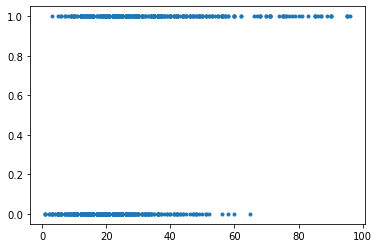

In [14]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots()
ax.plot(college_clean.Top10perc,college_clean.above_average,'.');

We can see that the data falls on two horizontal lines (at 0 and 1). What logistic regression will do is try and work out where the cutoff is for assigning each label, to explain how this works we are first going to build a linear regression model.

In [15]:
from sklearn.linear_model import LinearRegression


y=college_clean.above_average
X=college_clean[['Top10perc']]

lr=LinearRegression()
lr.fit(X,y)

print(lr.score(X,y))

0.16542588815656678


Building a linear regression model returns an r-squared score of 0.165, so not very good. But if we plot the regression line it will begin to help us understand how logistic regression works:

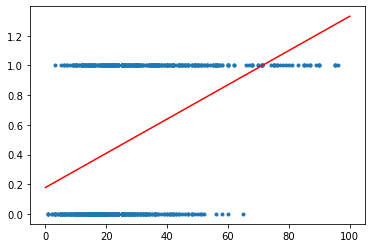

In [16]:
import numpy as np

fig,ax=plt.subplots()
ax.plot(college_clean.Top10perc,college_clean.above_average,'.')
X_plot=np.linspace(0,100,200)
ax.plot(X_plot,X_plot*lr.coef_[0]+lr.intercept_,color='r');

We can see the regression line doesn't fit to the data well at all, which isn't surprising. However, what we can do is use this line to help us assign a label. Remember, a regression line tries to assign a continous value, so let's say anything predicted on our regression line above 0.5 is label 1 (above average) and anything below is 0.

Recall from the previous section that the formula for a linear regression is:

<p style=font-size:24pt>$\hat{y}$ = $\beta$$_0$ + $\beta$$_1$$x$$_1$</p> 


So knowing what $\beta$$_0$ and $\beta$$_1$ is, and that we want to find out what expenditure would result in a prediction of 0.5 we can write the following formula:

In [17]:
(0.5-lr.intercept_)/lr.coef_[0]

27.917592405574627

So, according to linear regression, a school with more than 27.9% of their students coming from the top 10% of their high school class will have above average graduation rates.

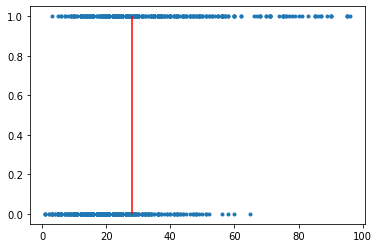

In [18]:
fig,ax=plt.subplots()
ax.plot(college_clean.Top10perc,college_clean.above_average,'.')
ax.vlines(27.9,ymin=0,ymax=1,color='r');

So anything to the left of the line will be asigned a label of 0 (below average) and anything to the right will be assigned as being above average.

We can see though that this still isn't ideal, there are a few colleges on the bottom that we know are below average but would be predicted as above, and the same the other way round. We know models will always make mistakes, which is why we want to find the one which minimises them. However, using a straight line to predict something like this will always lead to more errors.

Therefore, logistic regression does not use a regression line for making its predictions, but a sigmoid curve:

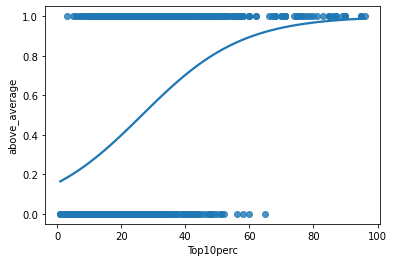

In [19]:
import seaborn as sns
fig,ax=plt.subplots()
sns.regplot(x=college_clean.Top10perc, y=college_clean.above_average, data=college_clean, logistic=True, ci=None);

Instead of using a linear regression formula, logistic regression uses the following formula to make its predictions:

<p style=font-size:24pt>$p(x)$ = $\frac{1}{1 + e^{-(\beta_0 + \beta_1x)}}$</p> 

This might look scary, but don't worry (python does the calculations anyway). What it means is that the probability ($p(x)$) of assigining a label is found by using that formula. You may notice that contained within that formula is the equation for a linear regression. This is why it is called logistic <i>regression</i> as the model will first perform regression analysis on the data, and then use the outputs to calculate the probability of each data point being assigned a label.

This approach is less sensitive to outliers and follows the data better. Fortunately we don't need to do all this ourselves, but can use sklearns logistic regression function. It is always good practice to use train_test_split so we can check if the model is fitting appropriately later.

In [20]:
from sklearn.model_selection import train_test_split

X=college_clean[['Top10perc']]
y=college_clean.above_average

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, train_size=0.8,random_state=100)
# Notice the additional argument, startify=y, this is to ensure that both sets have the same proportion of target labels

In [21]:
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

The first thing you should notice is that the syntax for setting up this model is the same as before, just a different name. The second thing is that there are some parameters we can play with. We will not be discussing these now, but if you are interested, read the <a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>documentation</a> to find out more.

## Interpret the model

Like with linear regression we can examine the intercept and coefficient of the model:

In [23]:
logreg.intercept_[0]

-1.6627562760193226

This means that if a school has nobody that came from the top 10% of their high school class it will start with a probability below 0 of being above average.

In [24]:
logreg.coef_[0]

array([0.06314022])

We interpret this as for every 1% increase in students from the top 10% of their high school class, the probability of that school being predicted as above average goes up by 0.06 (or 6%).

### Practice

Load in the Ames housing data you used earlier. 

<ol>
    <li> Create a new column called above_average that assigns a value of 1 if the sale price is greater than the mean sale price and 0 if otherise.</li>
    <li> Build a logistic regression model that predicts if a house has an above average sale price based on the number of full bathrooms it has.</li>
    <li> Print and interpret the coefficient of the model in the context of the data. </li>
</ol>

In [15]:
house_df=pd.read_csv('Ames_houses.csv')
house_df.head()

,SalePrice,LotFrontage,LotArea,Utilities,Neighborhood,YearBuilt,FullBath,HalfBath,BedroomAbvGr,GarageCars,GarageArea
0,208500,65.0,8450,AllPub,CollgCr,2003,2,1,3,2,548
1,181500,80.0,9600,AllPub,Veenker,1976,2,0,3,2,460
2,223500,68.0,11250,AllPub,CollgCr,2001,2,1,3,2,608
3,140000,60.0,9550,AllPub,Crawfor,1915,1,0,3,3,642
4,250000,84.0,14260,AllPub,NoRidge,2000,2,1,4,3,836


In [16]:
house_df['above_average']=house_df.SalePrice.apply(lambda x: 1 if x>house_df.SalePrice.mean() else 0)

In [17]:
X_h=house_df[['FullBath']]
y_h=house_df.above_average

X_trainh, X_testh, y_trainh, y_testh = train_test_split(X_h,y_h,stratify=y_h,train_size=0.8,random_state=192)

In [18]:
logreg3=LogisticRegression()
logreg3.fit(X_trainh,y_trainh)

LogisticRegression()

In [19]:
logreg3.coef_ #for every full bathroom a house has, the probability of it being predicted as above average goes by 2.87%

array([[2.87376067]])

## Multiple features

A logistic regression model can take on as many features as you would like, with each added potentially giving more detail to the model. However, beware of over fitting and to check this we should be using train_test_split.

Let's pull all this together and build a model which predicts if a college has an above average graduation rate based on its expenditure per student and what percentage of students came from the top 10% of thier high school class.

In [27]:
X2=college_clean[['Top10perc','Expend']]
y2=college_clean.above_average

In [28]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, stratify=y2, train_size=0.8,random_state=100)

In [29]:
# build model

logreg2=LogisticRegression()
logreg2.fit(X_train2, y_train2)

LogisticRegression()

In [30]:
logreg2.intercept_

# How would you interpret this value?

array([-2.15872524])

In [31]:
logreg2.coef_

# How would you interpret these values?

array([[5.11196133e-02, 8.87342036e-05]])

### Practice

Using the data from the previous workbook, build a model that will predict if a house has an above average sale price based off number of bedrooms, number of bathrooms and how many cars it can fit into the garage. Which feature is most influential in predicting if a house is above average sale price?

In [25]:
house_df.columns

Index(['SalePrice', 'LotFrontage', 'LotArea', 'Utilities', 'Neighborhood',
       'YearBuilt', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'GarageCars',
       'GarageArea', 'above_average'],
      dtype='object')

In [31]:
X_h2=house_df[['FullBath','BedroomAbvGr','GarageCars']]
X_trainh2, X_testh2, y_trainh2, y_testh2 = train_test_split(X_h2,y_h,stratify=y_h,train_size=0.8,random_state=192)

In [32]:
logreg4=LogisticRegression()
logreg4.fit(X_trainh2,y_trainh2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
coef_df=pd.DataFrame({'Features':X_h2.columns,'Effect Size':logreg4.coef_[0]}).set_index('Features').sort_values(by='Effect Size')
coef_df

,Effect Size
Features,
BedroomAbvGr,-0.044755
GarageCars,1.947079
FullBath,2.235788


In [39]:
# As above, the number of bathrooms is the most influnetial factor

## Making a prediction

We have seen how to interpret the outputs of a model, but what about making a new prediction? It is the same process as before, we use `.predict()`.

Imagine there is a college which has 17% of its learners coming from the top 10% of their high school class. Will our model predict it as having an above average graduation rate?

In [37]:
logreg.predict([[17]])

array([0], dtype=int64)

According to our model this college would have a below average graduation rate. If we wanted to look into this a bit more by observing why the model put this college into the below average category we can use the `predict_proba()` function:

In [38]:
logreg.predict_proba([[17]])

array([[0.64322115, 0.35677885]])

Based on the information we gave the model it decided there was a 35.7% chance of this college having an above average graduation rate. As this is below 50% the model decided it was below average.

If we then found out that this college was spending $38392 per student, how would this affect the outcome?

In [39]:
logreg2.predict([[17,38392]])

array([1], dtype=int64)

With this new information, the second model has decided that this college would now be above average on graduation rate.

In [40]:
logreg2.predict_proba([[17,38392]])

array([[0.10745625, 0.89254375]])

The second model thinks the probability of this college being above average is now 89.3% which is why it assigned the positive label.

### Practice

A new house comes onto the market with 2 full bathrooms, 3 bedrooms and a garage that can fit 2 cars, what label does each model you have built assign to this house? Examine the probabilities the models have assigned, which one had the greater confidence in its decision?

In [45]:
print('model 1 predicts this house will be: '+str(logreg3.predict([[2]])))
print('model 2 predicts this house will be: '+str(logreg4.predict([[2,3,2]])))

model 1 predicts this house will be: [1]
model 2 predicts this house will be: [1]


In [47]:
print('model 1 probabilities: '+str(logreg3.predict_proba([[2]])))
print('model 2 probabilities: '+str(logreg4.predict_proba([[2,3,2]])))

model 1 probabilities: [[0.38905404 0.61094596]]
model 2 probabilities: [[0.40725773 0.59274227]]


In [48]:
# Model 1 is more confident with a probability of 61% 